### Problem Statement:
#### Description

#### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database
#### The database includes the following indicators:

#### `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
#### `country_long` (text): longer form of the country designation
#### ` name` (text): name or title of the power plant, generally in Romanized form
#### `gppd_idnr` (text): 10 or 12 character identifier for the power plant
#### `capacity_mw` (number): electrical generating capacity in megawatts
#### `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
#### `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
#### `primary_fuel` (text): energy source used in primary electricity generation or export
#### `other_fuel1` (text): energy source used in electricity generation or export
#### `other_fuel2` (text): energy source used in electricity generation or export
#### `other_fuel3` (text): energy source used in electricity generation or export
####  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
#### `owner` (text): majority shareholder of the power plant, generally in Romanized form
#### `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
#### `url` (text): web document corresponding to the `source` field
#### `geolocation_source` (text): attribution for geolocation information
#### `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
#### `year_of_capacity_data` (number): year the capacity information was reported
#### `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
#### `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
#### `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
#### `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
#### `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
#### `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
#### `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
#### `generation_data_source` (text): attribution for the reported generation information
#### `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
#### `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
#### `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
#### `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
#### `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
#### 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
#### `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
#### `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
#### `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
#### `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


#### Fuel Type Aggregation
#### We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('database_IND.csv')

pd.set_option('display.max_columns', None)
df


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### From data information we can see
#### Data having 27columns and 907 Rows
#### Out of 27, 15 columns are float data type and 12 columns are Object data type
#### Data is having missing values also in many columns.
#### for exatct count lets check the null values present in the data.

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Here we can see most of the data columns are having missing values
In some columns we have colplete missing data
latitude and longitude have 46 missing values
other_fuel1, other_fuel2 and other_fuel3 are having large number of missing values
commissioning_year year have 380 nul values and oweners information also missing
wepp_id is completely missing
some of the importtant columns having missing values near about 500, we will decide later, we need to drop or fill the colums.

Drop all the columns which are not relevent.
country, country_long are just the name, and here we are data only for india, so droping this will not effect on output.



In [5]:
df.drop(['country', 'country_long'], inplace= True, axis= 1)

df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.shape

(907, 25)

In [7]:
df.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','year_of_capacity_data','geolocation_source', 'generation_data_source','generation_gwh_2019','generation_gwh_2013','estimated_generation_gwh','source'], inplace= True, axis= 1)


In [8]:
df.shape

(907, 13)

In [9]:
df.isnull().sum()


name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [10]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)

df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 


In [11]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

### EDA
###### Univariate analysis
###### Lets plot the distrubution and conuts for targat and feature columns.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

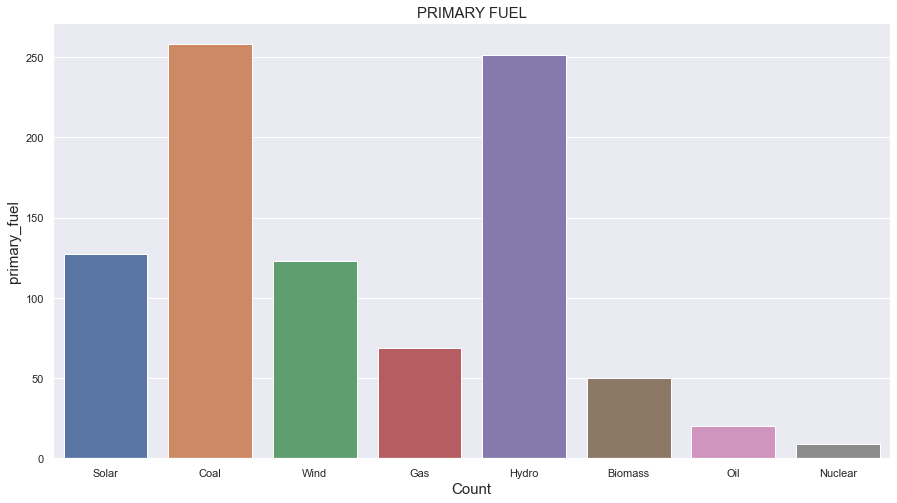

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('PRIMARY FUEL', fontsize=15)

df['primary_fuel'].value_counts()


Here we can see, most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
Use of solar and wind also considerable.

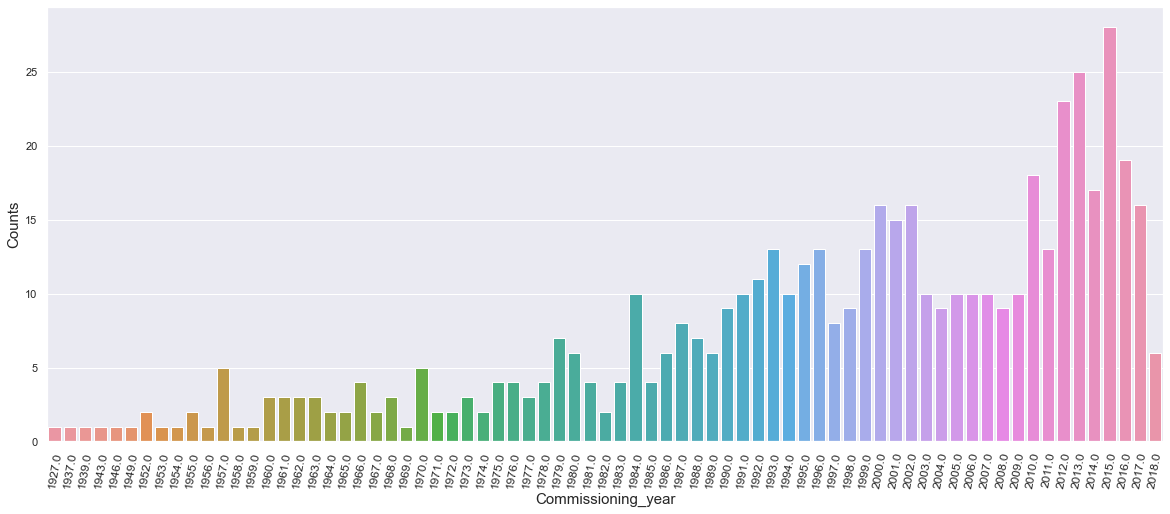

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(df['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()


Here we can see first power plant in India starts in 1927.
The count is very low till 1956.
From 1957 to 1983 there is contineous developmet of 3 to 5 power plant every year.
The number increases 1964 with total count of 10.
After 1964 there conutineuos growth in power sector.
In the year 2013 we have maximum number of Power plant, the count is more than 25.

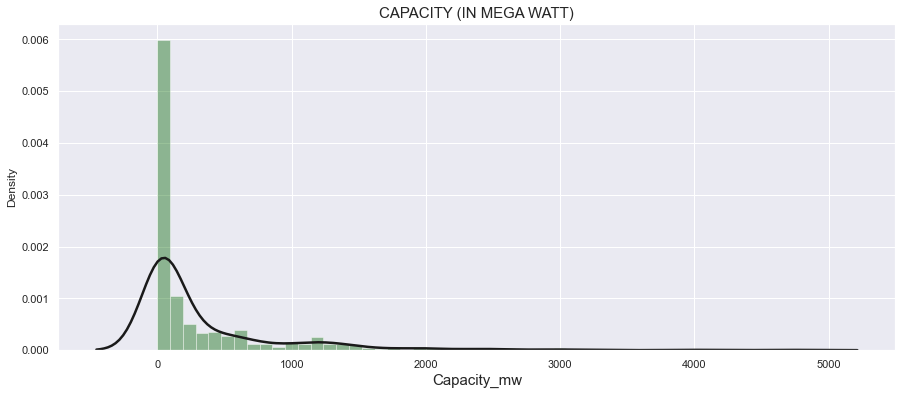

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(df['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('CAPACITY (IN MEGA WATT)', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()


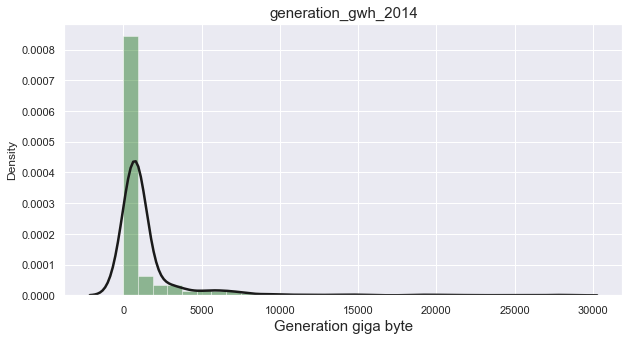

In [15]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


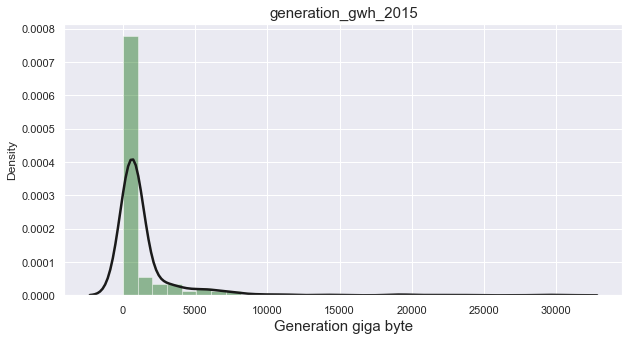

In [16]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


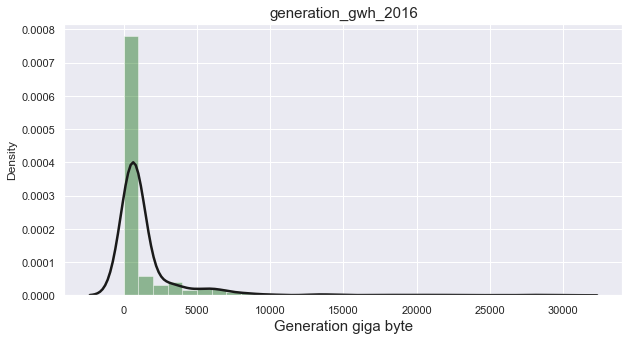

In [17]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


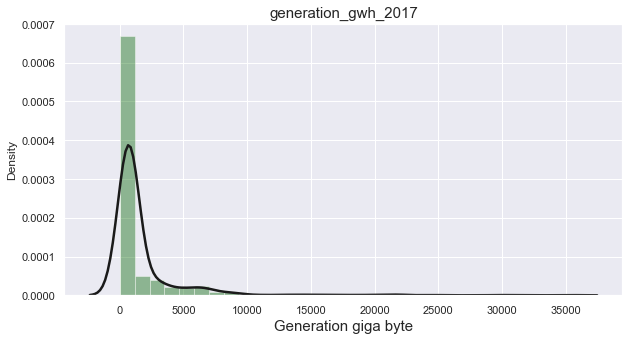

In [18]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()


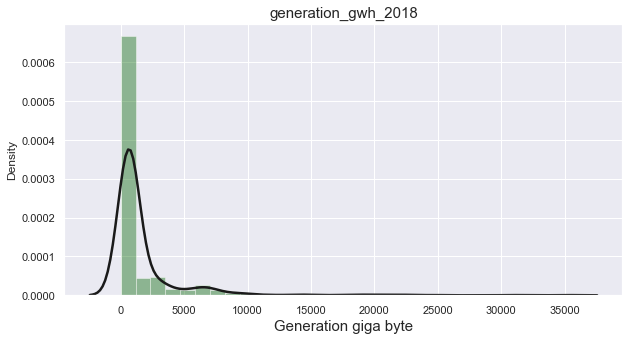

In [19]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2018'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

#### Bivariate Analysis
In bivariate analysis, we will analyse the features columns aagint target column.

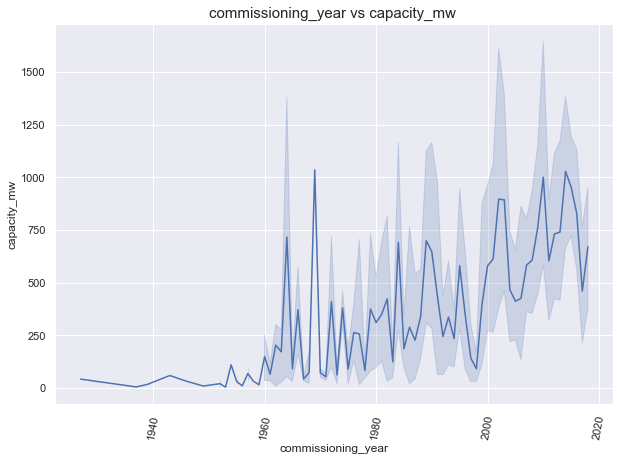

In [20]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


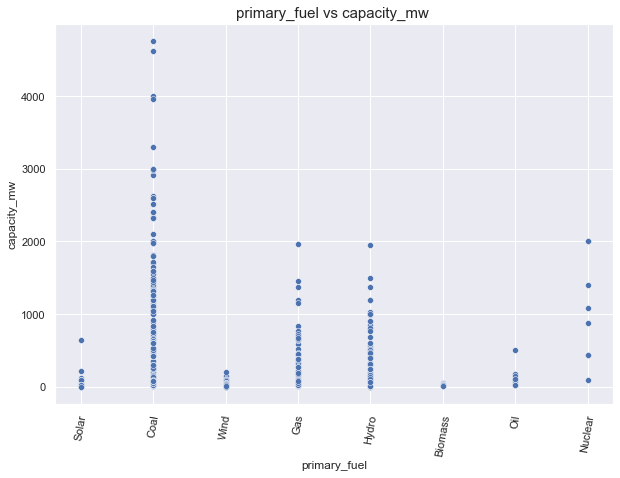

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


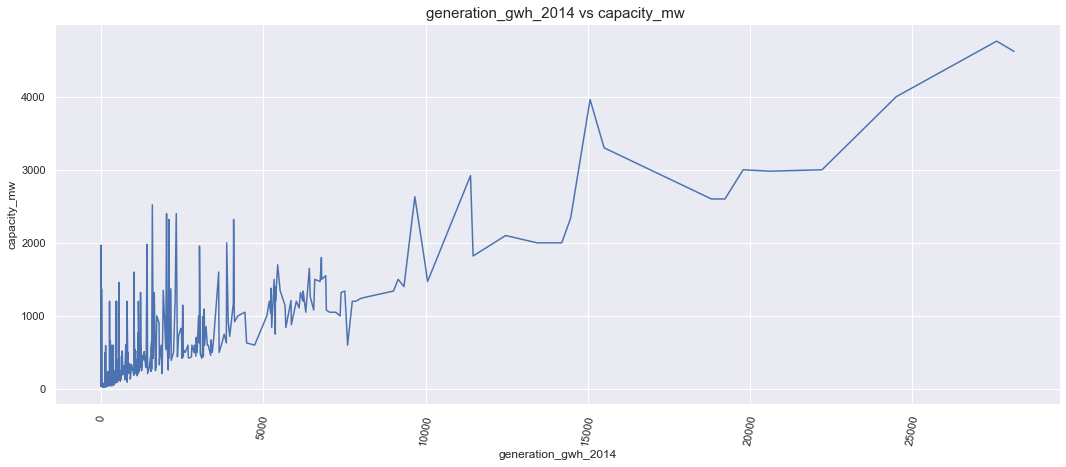

In [22]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


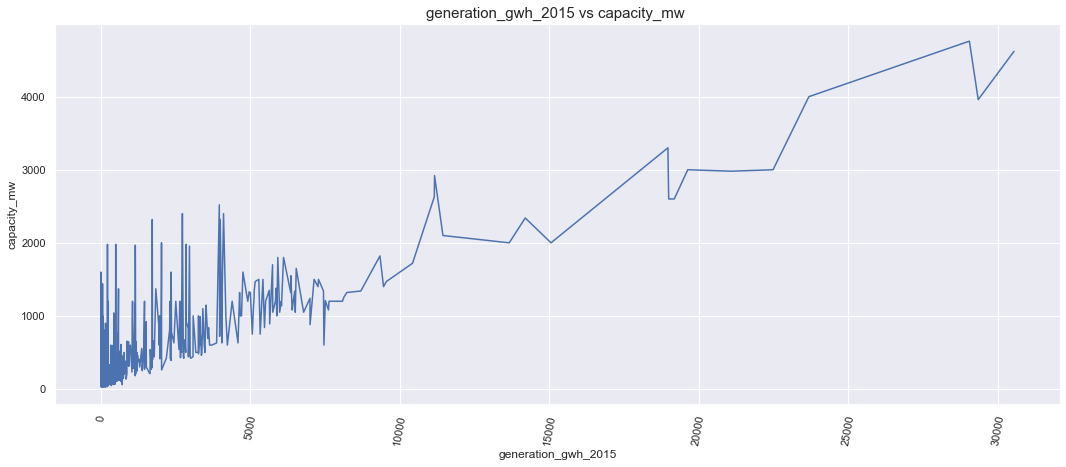

In [23]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


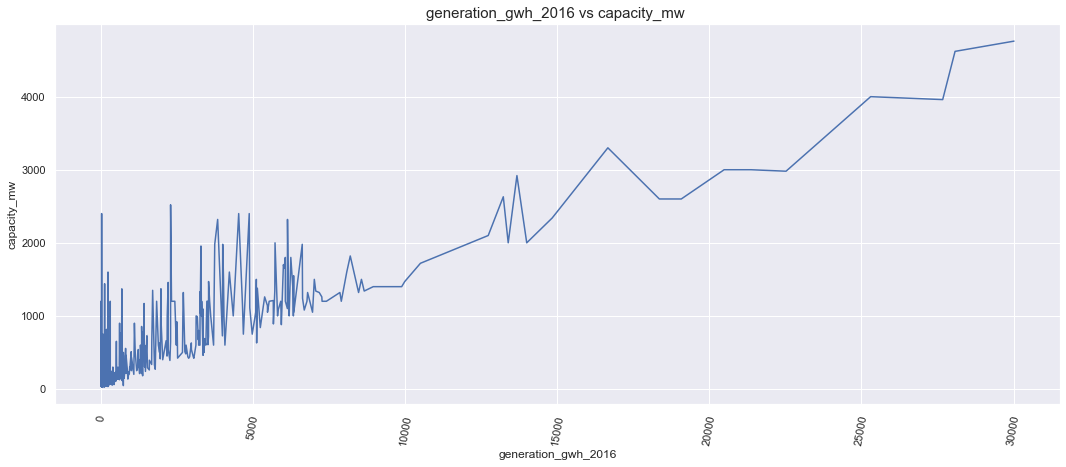

In [24]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


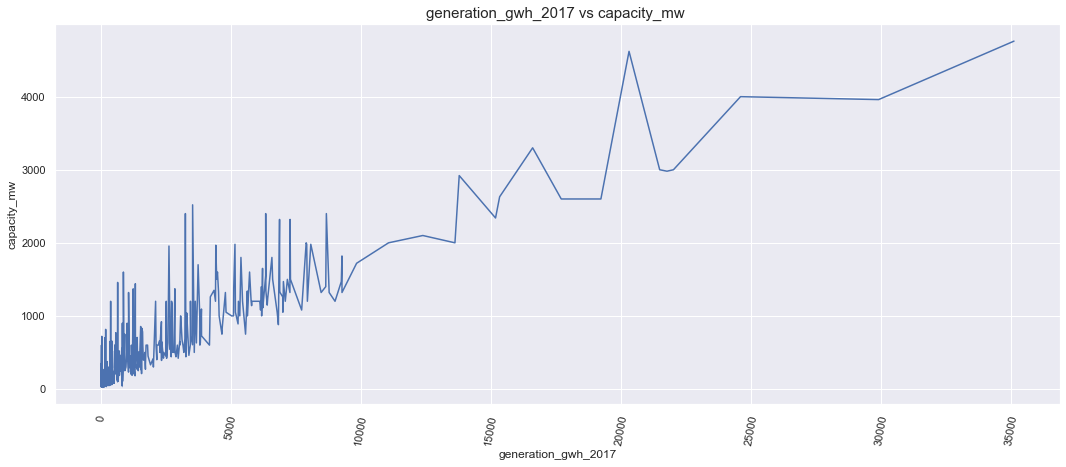

In [25]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


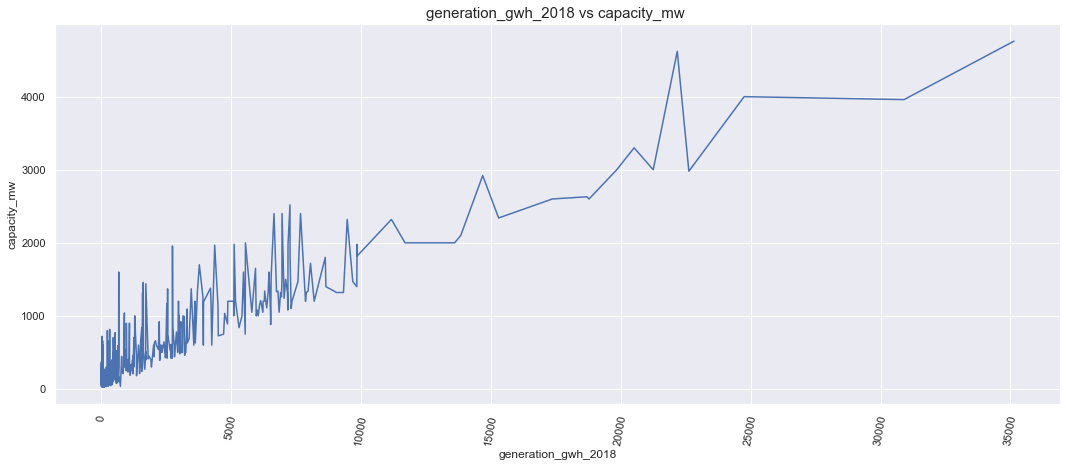

In [26]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2018',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


### Multivariate analysis

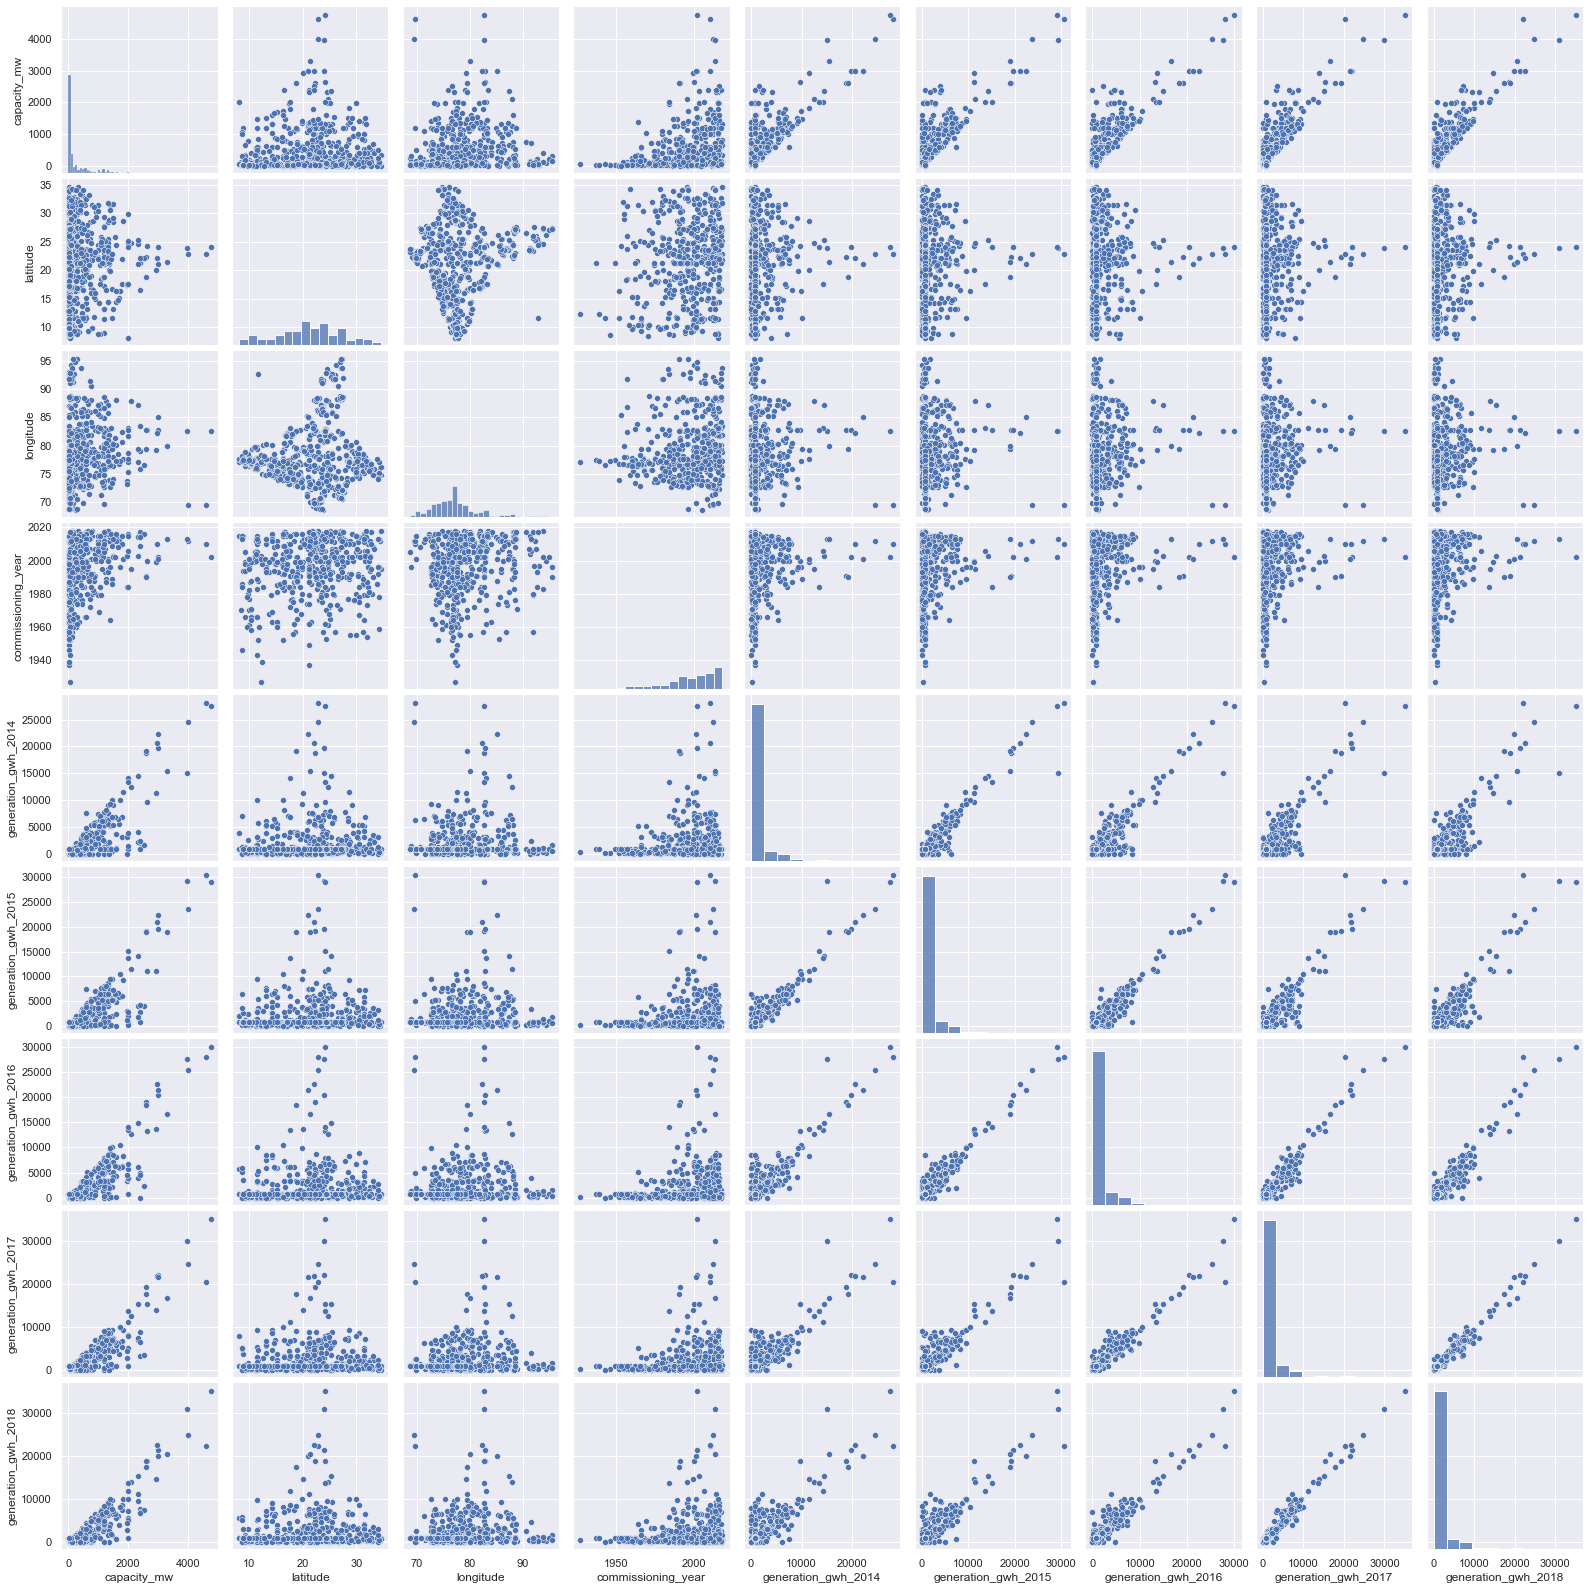

In [27]:
sns.pairplot(df)
plt.show()

### EDA Summary
capacity_mw: we can see capacity is mostly dependent on Coal.
latitude & longitude : They are not playing very good role in capacity_mw.
primary_fuel: Mostly Coal is used as primary fuel.
commissioning_year: we can see capacity incerases after 2000.
generation_gwh_2013-2017: we can see generation growth is almost same for each year

#### Data Processing
Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.



In [28]:
df.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

#### Encoding Target columns

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [30]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,-0.010204,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,-0.347948,0.104649,0.121513,0.143459,0.151712,0.155063
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.055216,0.155063,-0.271198,0.895143,0.933161,0.964988,0.986685,1.000000


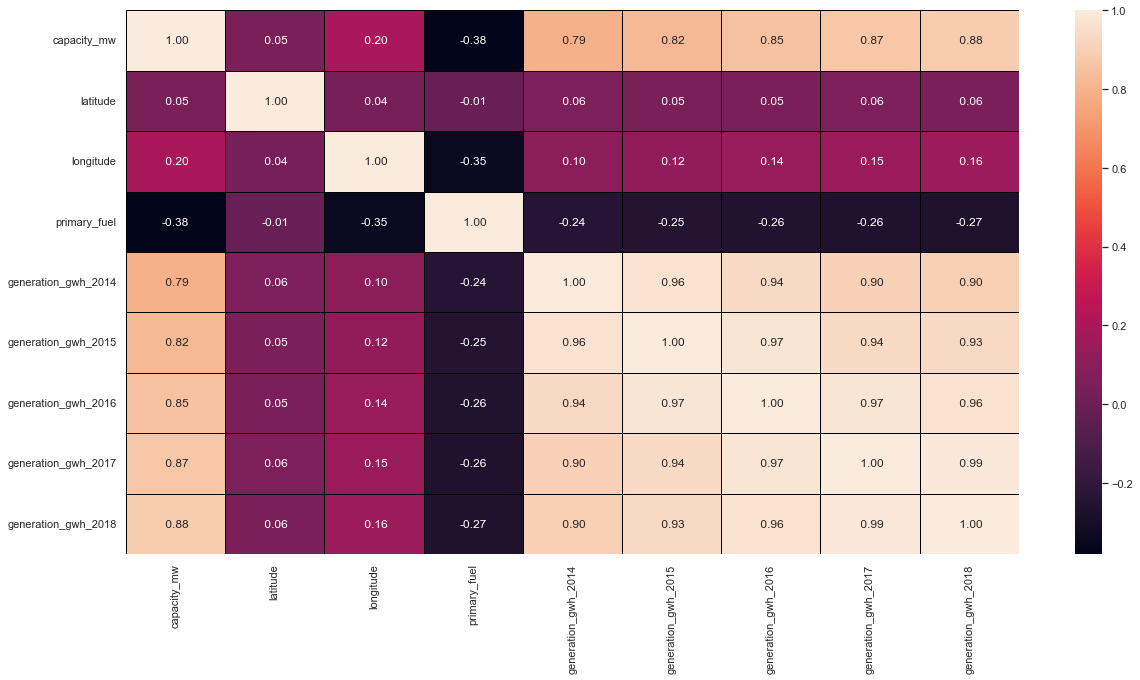

In [31]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )
plt.show()

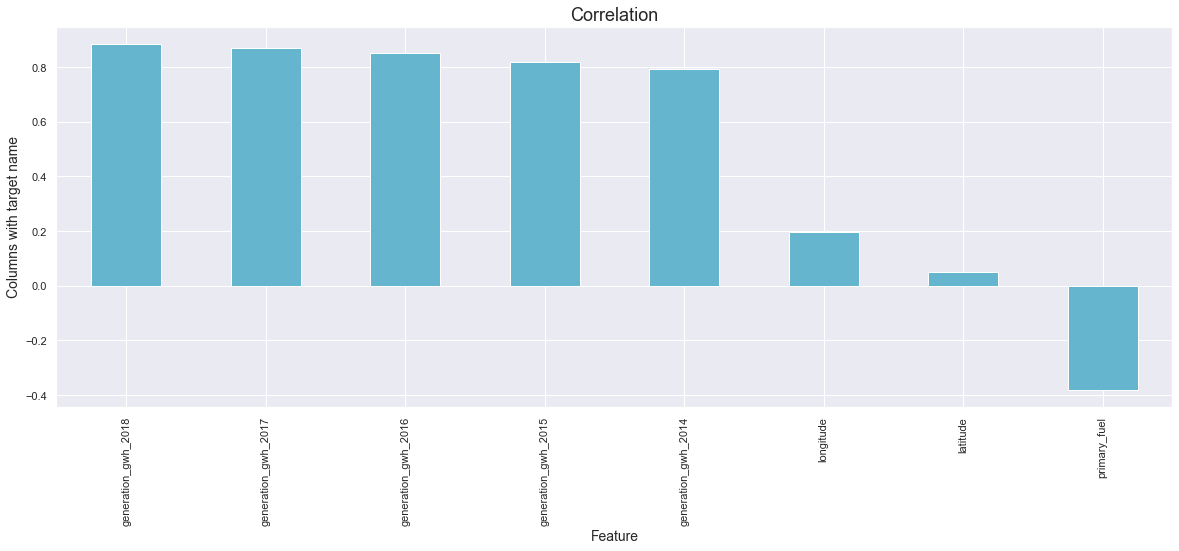

In [32]:
plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [33]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


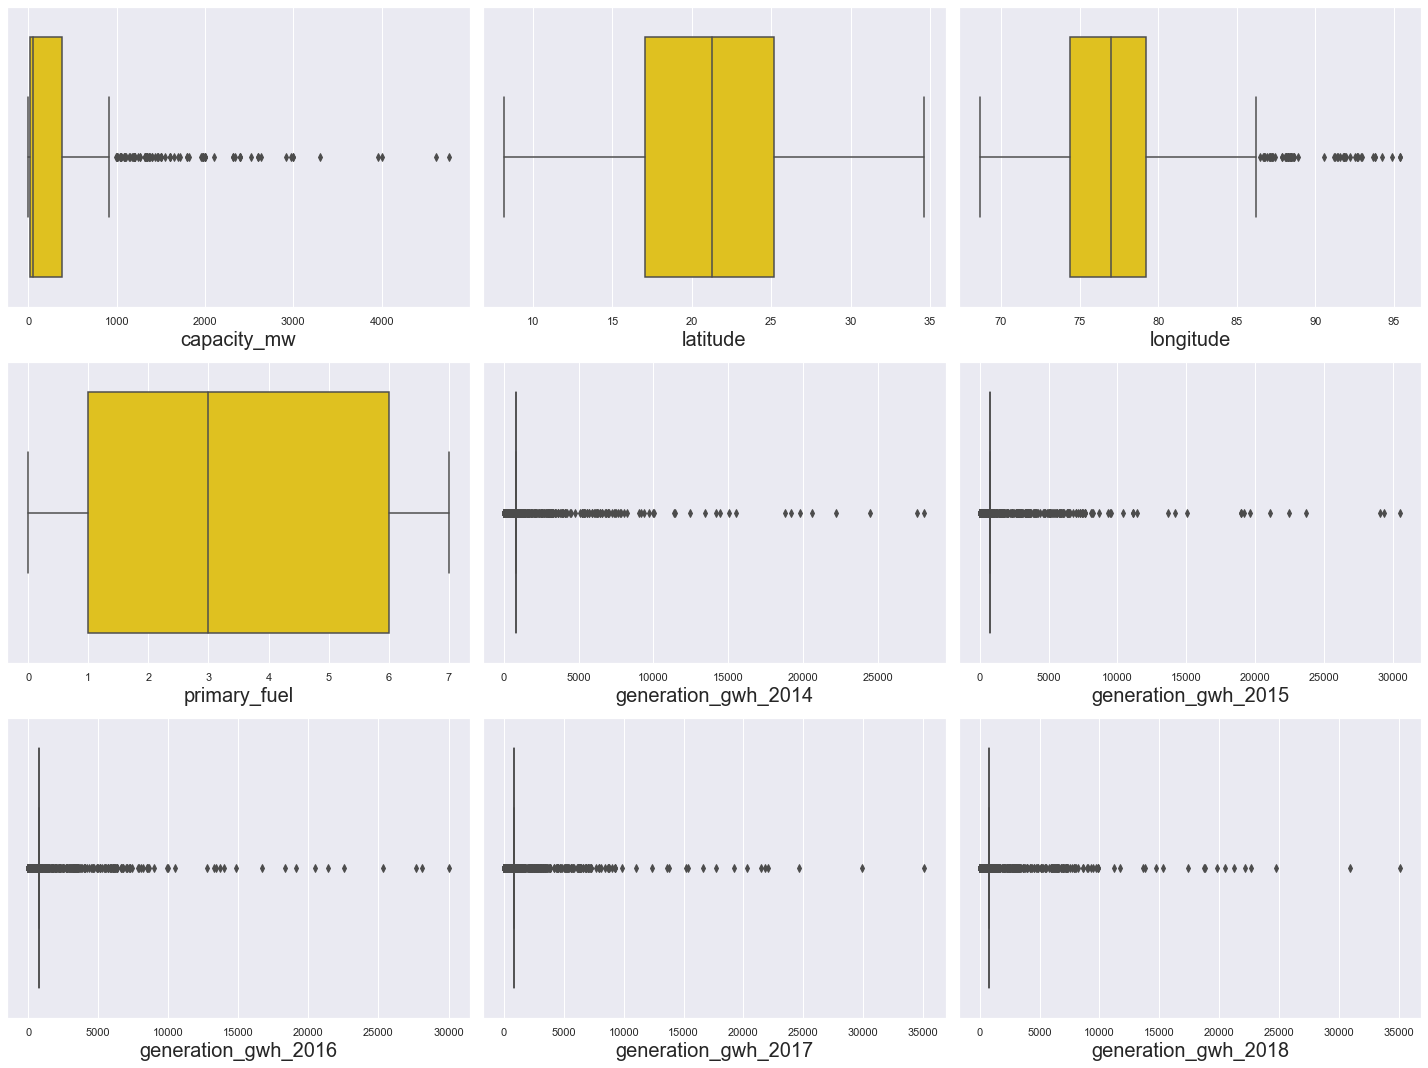

In [34]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Removing Outliers

In [35]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold= 3 
print(np.where(z>3))


(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [36]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(907, 9)
(866, 9)


In [37]:
df.skew()


capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df.drop(['capacity_mw'], axis=1)
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [39]:
X=pd.DataFrame(data=x)

In [40]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [41]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [42]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [43]:
dfx=pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018',])


In [44]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [45]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.020329
1,longitude,1.150102
2,primary_fuel,1.191438
3,generation_gwh_2014,4.040142
4,generation_gwh_2015,6.819038
5,generation_gwh_2016,11.064083
6,generation_gwh_2017,9.912401
7,generation_gwh_2018,9.630643


In [46]:
dfx.drop('generation_gwh_2016', axis=1, inplace=True )

In [47]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.016232
1,longitude,1.144231
2,primary_fuel,1.190890
3,generation_gwh_2014,4.024747
4,generation_gwh_2015,4.821296
5,generation_gwh_2017,8.806506
6,generation_gwh_2018,9.049430


In [48]:
x=dfx

Vif is less than 10 we can proceed for model development

## Model development

In [49]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [50]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 201 The model perform very well
At random State: 201
Training r2_score 51.6102354665104
Testing r2 score  51.64402806833339
At Random state 211 The model perform very well
At random State: 211
Training r2_score 51.68937247457161
Testing r2 score  51.73994934453143
At Random state 703 The model perform very well
At random State: 703
Training r2_score 51.28710075007277
Testing r2 score  51.25898085724907


In [51]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 211)

In [52]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))


Linear model accuracy is:  0.5173994934453143


In [53]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 44.2433824923948 and Accuracy score is 51.73994934453143
At cross fold 3 the Cross Val score is 43.066687413196235 and Accuracy score is 51.73994934453143
At cross fold 4 the Cross Val score is 46.651024535349634 and Accuracy score is 51.73994934453143
At cross fold 5 the Cross Val score is 46.56879557902428 and Accuracy score is 51.73994934453143
At cross fold 6 the Cross Val score is 44.47353138514753 and Accuracy score is 51.73994934453143
At cross fold 7 the Cross Val score is 46.53729989954958 and Accuracy score is 51.73994934453143
At cross fold 8 the Cross Val score is 47.15757948861993 and Accuracy score is 51.73994934453143
At cross fold 9 the Cross Val score is 42.83424421124108 and Accuracy score is 51.73994934453143


In [54]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 280.32312370612135
Mean Squared Error: 172844.65699261898
Root Mean Square Error: 415.745904360607


## 2. Lasso

In [55]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 


R2 score: 51.741204805981454
Cross val Score : 47.18530381424749


In [56]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))


Error:
Mean Absolute Error: 280.3378800926023
Mean Squared Error: 172840.16052399226
Root Mean Square Error: 415.740496612962


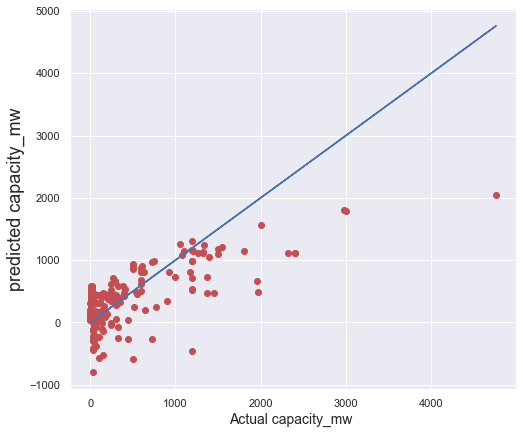

In [57]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

## 3. Ridge

In [58]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)



r2 score:  51.73881411841196
Cross val Score 47.175798698328784


In [59]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))


Error:
Mean Absolute Error: 280.3390099811633
Mean Squared Error: 172848.7228352065
Root Mean Square Error: 415.75079414861796


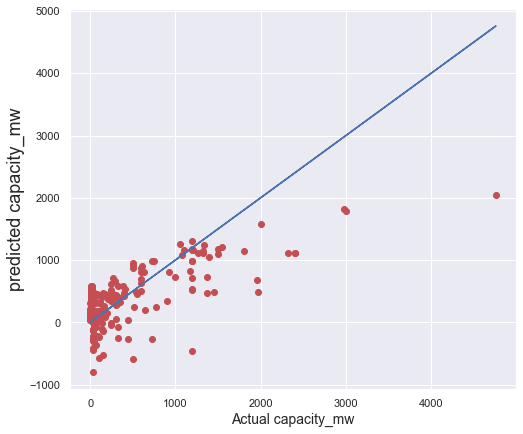

In [60]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()


## 3. Decision TreeRegressor

In [61]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)


R2 Score: 67.72147708337303
Cross Val Score: 74.86980374934531


In [62]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))


Error:
Mean Absolute Error: 154.7002106227106
Mean Squared Error: 115606.38967378665
Root Mean Square Error: 340.009396449255


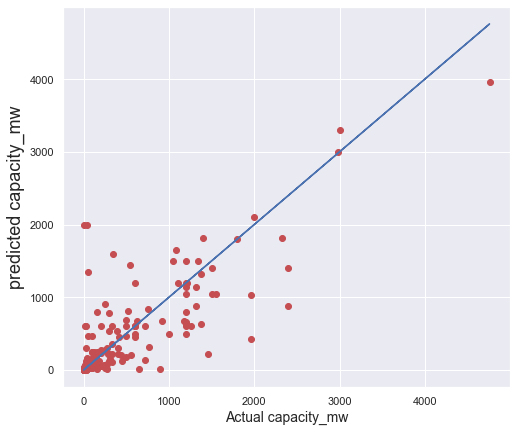

In [63]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

### 4. KNeighborsRegressor

In [64]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 80.73593254711587
Cross val Score : 81.38113044335637


In [65]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))


Error:
Mean Absolute Error: 123.31541391941391
Mean Squared Error: 68994.77074624937
Root Mean Square Error: 262.6685568282762


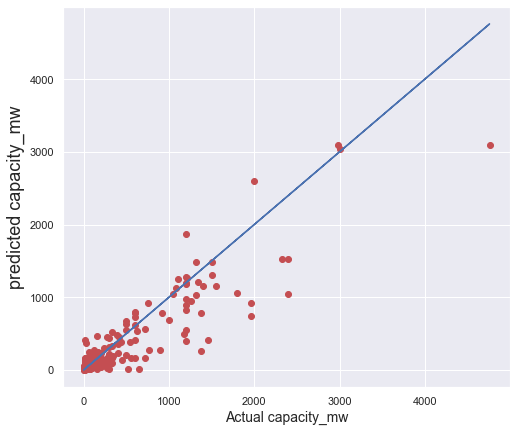

In [66]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

### 5. Ensemble Techniques

In [67]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )


R2 score: 80.34664695703333
Cross val Score : 85.38620459914614


In [68]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 125.75041648906263
Mean Squared Error: 70389.00745707136
Root Mean Square Error: 265.3092675672513


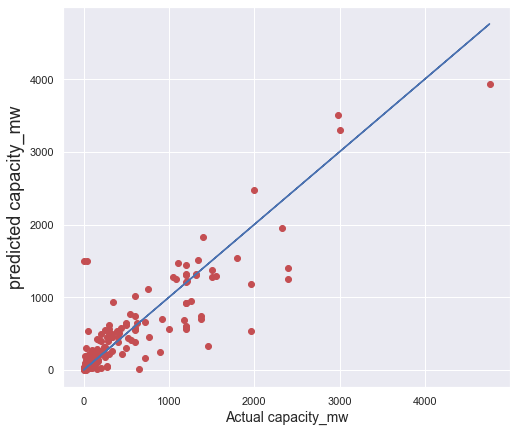

In [69]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()


### 7. GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )


R2 score: 80.34664695703333
Cross val Score : 83.7640502615737


In [71]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))


Error:
Mean Absolute Error: 125.75041648906263
Mean Squared Error: 70389.00745707136
Root Mean Square Error: 265.3092675672513


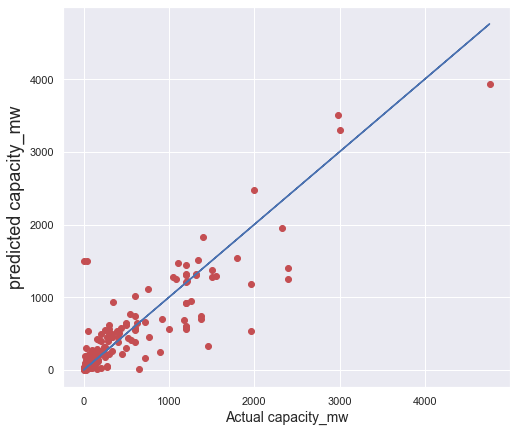

In [72]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()


### HyperParameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)


{'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}


In [76]:
rf=RandomForestRegressor(criterion='absolute_error', max_features='sqrt', min_samples_split=3, n_estimators=100)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)


R2 score: 84.57871736608148
Cross val Score : 85.84608313060389


### Saving Best Model

In [77]:
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))


In [78]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,400.0,397.422070
1,12.0,20.519150
2,75.0,17.990250
3,97.0,98.939775
4,920.0,662.675000
...,...,...
268,100.0,198.902300
269,63.2,60.997500
270,36.3,7.650000
271,720.0,187.053900


### Lets predict the primary fuel.

In [85]:
df1

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [86]:
# deviding into fetures and target. 
x=df1.drop('primary_fuel', axis=1)
y=df1['primary_fuel']


In [87]:
x.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [88]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')

In [89]:
X2=pd.DataFrame(data=x)

In [90]:
SDc=StandardScaler()
X2=SDc.fit_transform(X2)


In [91]:
X2

array([[-1.6833227 ,  1.15626742, -0.93885467, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.24978411,  0.59104013, -0.51903111, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.25138397,  0.12112001, -2.37998905, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       ...,
       [-0.48802138, -0.95235366, -0.24462176, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.13943645,  0.52249096, -0.77847826, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.72678912, -1.79828311,  0.23982923, ..., -0.02668675,
        -0.0118393 , -0.03537354]])

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [93]:
df1.columns


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [94]:
dfy=pd.DataFrame(data=X2, columns=['capacity_mw','latitude', 'longitude',
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018',])


In [95]:
dfy

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.683323,1.156267,-0.938855,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
1,0.249784,0.591040,-0.519031,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
2,-0.251384,0.121120,-2.379989,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
3,0.422961,0.443736,2.428832,-0.249081,0.115639,0.126619,-0.178492,-0.175228
4,1.768702,0.130362,1.244663,1.448967,2.320849,2.317527,2.037720,2.431710
...,...,...,...,...,...,...,...,...
861,1.709760,-0.788809,0.211004,-0.023489,-2.472611,-0.831122,0.034848,-0.105704
862,-1.602083,-1.332201,0.400757,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
863,-0.488021,-0.952354,-0.244622,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
864,0.139436,0.522491,-0.778478,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374


In [96]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)


In [97]:
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.279531
1,latitude,1.024334
2,longitude,1.148649
3,generation_gwh_2014,3.582231
4,generation_gwh_2015,6.286462
5,generation_gwh_2016,10.754176
6,generation_gwh_2017,9.760924
7,generation_gwh_2018,9.241425


In [98]:
dfy.drop('generation_gwh_2016', axis=1, inplace=True)


In [99]:
x=dfy

### Model Development


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


### Chosing Best Random State

In [101]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)


At Random state  163 The Model performing Well
At Random State 163
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
At Random state  810 The Model performing Well
At Random State 810
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484


In [102]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=163,test_size=0.20)


In [103]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))


0.5172413793103449


In [104]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  0  0  1  0  0  2  6]
 [ 0 34  2 17  0  0  1  2]
 [ 0  1  3  4  0  0  0  1]
 [ 0 11  2 26  0  0  8  5]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  2]
 [ 0  0  0  3  0  0 14  1]
 [ 0  0  0  7  0  0  4 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.69      0.61      0.65        56
           2       0.38      0.33      0.35         9
           3       0.45      0.50      0.47        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.48      0.78      0.60        18
           7       0.43      0.54      0.48        24

    accuracy                           0.52       174
   macro avg       0.30      0.34      0.32       174
weighted avg       0.49      0.52      0.50       174



#### Cross validation of model

In [105]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")


at cv:- 2
Cross Validation scre is:- 49.07621247113164
Accuracy Score:- 51.724137931034484


at cv:- 3
Cross Validation scre is:- 49.534233628091755
Accuracy Score:- 51.724137931034484


at cv:- 4
Cross Validation scre is:- 49.53490356716163
Accuracy Score:- 51.724137931034484


at cv:- 5
Cross Validation scre is:- 50.804597701149426
Accuracy Score:- 51.724137931034484


at cv:- 6
Cross Validation scre is:- 50.569923371647505
Accuracy Score:- 51.724137931034484


at cv:- 7
Cross Validation scre is:- 51.143643924918514
Accuracy Score:- 51.724137931034484


at cv:- 8
Cross Validation scre is:- 51.14572714916752
Accuracy Score:- 51.724137931034484


at cv:- 9
Cross Validation scre is:- 50.79944635357007
Accuracy Score:- 51.724137931034484




### SVC

In [106]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)


Accuracy_core: 64.9425287356322
Cross val Score : 59.80610771321781


In [107]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))


[[ 0  1  0  0  0  0  2  6]
 [ 0 43  1  5  0  0  1  6]
 [ 0  3  2  3  0  0  0  1]
 [ 1  5  0 35  0  0  5  6]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0 15  3]
 [ 0  2  0  0  0  0  4 18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.75      0.77      0.76        56
           2       0.50      0.22      0.31         9
           3       0.81      0.67      0.74        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.56      0.83      0.67        18
           7       0.43      0.75      0.55        24

    accuracy                           0.65       174
   macro avg       0.38      0.41      0.38       174
weighted avg       0.63      0.65      0.63       174



Accuracy_core: 64.9425287356322
Cross val Score : 59.80610771321781
model performance is not satisfactory

### KNeighborsClassifier

In [108]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 67.24137931034483
Cross val Score : 65.36697247706422


In [109]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))



[[ 3  2  0  0  0  0  1  3]
 [ 3 42  1  6  0  0  3  1]
 [ 0  4  1  2  0  1  1  0]
 [ 2  3  2 41  0  0  2  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 1  2  0  1  0  0 13  1]
 [ 1  1  1  0  0  0  5 16]]
              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.74      0.75      0.74        56
           2       0.14      0.11      0.12         9
           3       0.82      0.79      0.80        52
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.52      0.72      0.60        18
           7       0.70      0.67      0.68        24

    accuracy                           0.67       174
   macro avg       0.46      0.46      0.46       174
weighted avg       0.66      0.67      0.67       174



### DecisionTreeClassifier

In [110]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )


accuracy_score 69.54022988505747
Cross val score is: 64.7776503567788


In [111]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[ 3  2  0  2  0  0  1  1]
 [ 0 39  5  6  0  1  2  3]
 [ 0  1  5  0  2  1  0  0]
 [ 2  5  1 42  1  0  1  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 1  0  0  1  0  0 14  2]
 [ 0  0  0  1  0  0  6 17]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.78      0.70      0.74        56
           2       0.38      0.56      0.45         9
           3       0.81      0.81      0.81        52
           4       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       0.58      0.78      0.67        18
           7       0.74      0.71      0.72        24

    accuracy                           0.70       174
   macro avg       0.52      0.53      0.52       174
weighted avg       0.71      0.70      0.70       174



### RandomForestClassifier

In [112]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )


accuracy_score:  74.71264367816092
Cross val Score : 71.48211858647639


In [113]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))


[[ 5  1  0  0  0  0  1  2]
 [ 0 44  4  4  0  0  1  3]
 [ 0  2  3  3  0  1  0  0]
 [ 2  4  0 45  0  0  0  1]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 1  0  0  1  0  0 14  2]
 [ 0  0  0  0  0  0  6 18]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.81      0.79      0.80        56
           2       0.33      0.33      0.33         9
           3       0.85      0.87      0.86        52
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.64      0.78      0.70        18
           7       0.69      0.75      0.72        24

    accuracy                           0.75       174
   macro avg       0.56      0.55      0.55       174
weighted avg       0.74      0.75      0.74       174



In [114]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )



accuracy_score:  48.275862068965516
Cross val Score : 34.87618926265716


In [116]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))


[[ 0  0  0  8  0  0  1  0]
 [ 0 27  0 26  1  0  1  1]
 [ 0  4  0  5  0  0  0  0]
 [ 0  4  0 48  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0]
 [ 0  0  0 11  0  0  7  0]
 [ 0  0  0 17  0  0  5  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      0.48      0.57        56
           2       0.00      0.00      0.00         9
           3       0.41      0.92      0.57        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      0.39      0.44        18
           7       0.67      0.08      0.15        24

    accuracy                           0.48       174
   macro avg       0.29      0.23      0.22       174
weighted avg       0.49      0.48      0.42       174



### GaussianNB

In [117]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 58.620689655172406
Cross Val Score is : 53.58583927964662


### Hyperparameter Tuning of the model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

code is running too long time because of low RAM even after one hour... few next step will be as shown in the cell

In [ ]:
rf=RandomForestClassifier(criterion='entropy/gini',max_depth=25/30/, max_features='sqrt/auto/log2', min_samples_split=5/15/2/100/10, n_estimators=1200/100/300/400/500/800 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )


In [ ]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))


In [ ]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com